# **Data Cleaning**

**1.1 Missing Value Imputation - Categorical Variable**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("/content/train.csv")

In [78]:
df.shape

(891, 12)

In [79]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [80]:
df.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [81]:
cat_vars = df.select_dtypes(include = 'object')
cat_vars.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [82]:
miss_val_per = cat_vars.isnull().mean()*100
miss_val_per

,0
Name,0.000000
Sex,0.000000
Ticket,0.000000
Cabin,77.104377
Embarked,0.224467


In [83]:
isnull_per = cat_vars.isnull().mean()*100
miss_vars = isnull_per[isnull_per > 0].keys()
miss_vars

Index(['Cabin', 'Embarked'], dtype='object')

In [84]:
cat_vars['Cabin'].fillna("Unique")

,Cabin
0,Unique
1,C85
2,Unique
3,C123
4,Unique
...,...
886,Unique
887,B42
888,Unique
889,C148


In [85]:
cat_vars['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [86]:
cat_vars['Cabin'].mode()

,Cabin
0,B96 B98
1,C23 C25 C27
2,G6


**Impute Mode Value**

In [87]:
cat_vars['Cabin'].fillna(cat_vars['Cabin'].mode()[0])

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
...,...
886,B96 B98
887,B42
888,B96 B98
889,C148


In [88]:
for var in miss_vars :
  cat_vars[var].fillna(cat_vars[var].mode()[0],inplace=True)
  print(var,"=",cat_vars[var].mode()[0])

Cabin = B96 B98
Embarked = S


In [89]:
cat_vars.isnull().sum()

,0
Name,0
Sex,0
Ticket,0
Cabin,0
Embarked,0


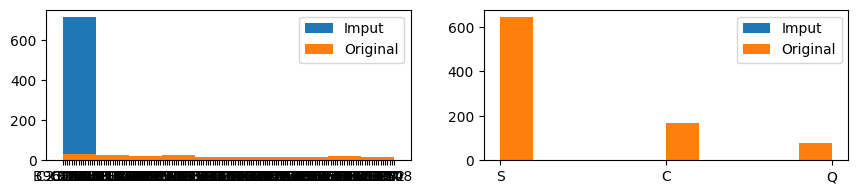

In [90]:
plt.figure(figsize=(16,9))
for i, var in enumerate(miss_vars):
  plt.subplot(4,3,i+1)
  plt.hist(cat_vars[var], label='Imput')
  plt.hist(df[var].dropna(),label='Original')
  plt.legend()

**Update Main Dataset**

In [91]:
df.update(cat_vars)
#df.drop(columns=miss_vars, inplace=True)

In [92]:
df.select_dtypes(include="object").isnull().sum()

,0
Name,0
Sex,0
Ticket,0
Cabin,0
Embarked,0
